<a href="https://colab.research.google.com/github/anvy87/AlgoTrading/blob/master/money_flow_index_MFI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving bnf5yrs.csv to bnf5yrs (2).csv


In [ ]:
df = pd.read_csv('bnf5yrs (2).csv')

In [ ]:
# set the index
df = df.set_index(pd.DatetimeIndex(df['Date'].values))
df

,Date,Open,High,Low,Close,z-score,Volume,Turnover (Rs. Cr)
2014-10-07,7-Oct-14,15214.25,15344.60,15157.70,15180.25,-1.57,20601315,1574.35
2014-10-08,8-Oct-14,15130.35,15371.80,15130.35,15344.00,-1.53,19840589,1410.06
2014-10-09,9-Oct-14,15434.35,15795.65,15434.35,15741.20,-1.45,27780819,1784.65
2014-10-10,10-Oct-14,15603.45,15628.75,15439.35,15453.80,-1.51,24179823,1362.02
2014-10-13,13-Oct-14,15360.70,15705.70,15301.65,15677.50,-1.47,26082820,1597.67
...,...,...,...,...,...,...,...,...
2020-09-25,25-Sep-20,20740.80,21064.30,20430.70,20982.35,-0.36,280646576,5902.57
2020-09-28,28-Sep-20,21152.05,21708.85,21055.10,21665.50,-0.22,240223120,5550.96
2020-09-29,29-Sep-20,21770.90,21811.50,21280.60,21411.30,-0.27,242993739,5129.99
2020-09-30,30-Sep-20,21405.25,21549.35,21128.50,21451.80,-0.26,240051659,5310.13


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1481 entries, 2014-10-07 to 2020-10-01
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               1481 non-null   object 
 1   Open               1481 non-null   float64
 2   High               1481 non-null   float64
 3   Low                1481 non-null   float64
 4   Close              1481 non-null   float64
 5   z-score            1481 non-null   float64
 6   Volume             1481 non-null   int64  
 7   Turnover (Rs. Cr)  1481 non-null   object 
dtypes: float64(5), int64(1), object(2)
memory usage: 104.1+ KB


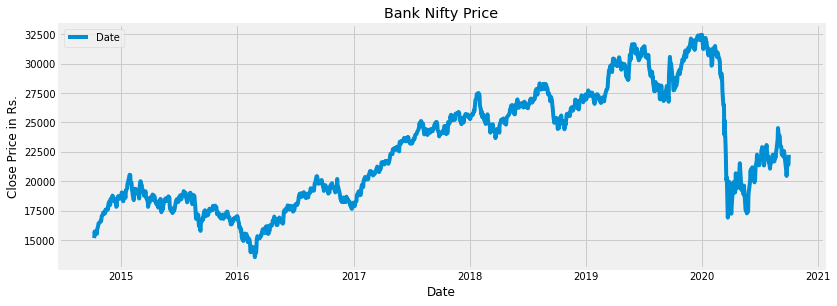

In [ ]:
# visulaize the data
plt.figure(figsize=(12.2, 4.5))
plt.plot(df['Close'], label = 'Close Price')
plt.title('Bank Nifty Price')
plt.xlabel('Date')
plt.ylabel('Close Price in Rs.')
plt.legend(df.columns.values, loc='upper left')
plt.show()

In [ ]:
# calculate the typical price
typical_price = ((df['Close'] + df['High'] + df['Low']) / 3).astype(int)
typical_price

2014-10-07    15227
2014-10-08    15282
2014-10-09    15657
2014-10-10    15507
2014-10-13    15561
              ...  
2020-09-25    20825
2020-09-28    21476
2020-09-29    21501
2020-09-30    21376
2020-10-01    22067
Length: 1481, dtype: int64

In [ ]:
# get the period
period  = 2

In [ ]:
# calculate the money flow
money_flow = typical_price * df['Volume']
money_flow

2014-10-07     313696223505
2014-10-08     303203881098
2014-10-09     434964283083
2014-10-10     374956515261
2014-10-13     405874762020
                  ...      
2020-09-25    5844464945200
2020-09-28    5159031725120
2020-09-29    5224608382239
2020-09-30    5131344262784
2020-10-01    7695381879350
Length: 1481, dtype: int64

In [ ]:
# get all of the positive abd negative money flow
positive_flow = []
negative_flow = []

In [ ]:
# loop through the typical_price
for i in range(period-1, len(typical_price)):
    if typical_price[i] > typical_price[i-1]:
        positive_flow.append(money_flow[i-1])
        negative_flow.append(0)
    elif typical_price[i] < typical_price[i-1]:
        negative_flow.append(money_flow[i-1])
        positive_flow.append(0)
    else:
        positive_flow.append(0)
        negative_flow.append(0)


In [ ]:
# get all of the positive and negative money flows within period
        
positive_mf = []
negative_mf = []

In [ ]:
for i in range(period-1, len(positive_flow)):
    positive_mf.append( sum(positive_flow[ i + 1 - period : i+1]) )
for i in range(period-1, len(negative_flow)):
    negative_mf.append( sum(negative_flow[ i + 1 - period : i+1]) )


In [ ]:
# calculate the money flow index
mfi = 100 * (np.array(positive_mf) / (np.array(positive_mf) + np.array(negative_mf) ))
mfi

array([100.        ,  41.07517715,  46.29545457, ..., 100.        ,
        49.68423088,  49.54970768])

In [ ]:
# visulaizing the MFI

df2 = pd.DataFrame()
df2['MFI'] = mfi
df2

,MFI
0,100.000000
1,41.075177
2,46.295455
3,100.000000
4,44.484210
...,...
1474,47.404501
1475,100.000000
1476,100.000000
1477,49.684231


In [ ]:
new_row1 = pd.DataFrame({'MFI' : 76.413629}, index = [0])
new_row2 = pd.DataFrame({'MFI' : 76.413629}, index = [1])
new_row3 = pd.DataFrame({'MFI' : 76.413629}, index = [2])
new_row4 = pd.DataFrame({'MFI' : 76.413629}, index = [3])
new_row5 = pd.DataFrame({'MFI' : 76.413629}, index = [4])
new_row6 = pd.DataFrame({'MFI' : 76.413629}, index = [5])
new_row7 = pd.DataFrame({'MFI' : 76.413629}, index = [6])
new_row8 = pd.DataFrame({'MFI' : 76.413629}, index = [7])
new_row9 = pd.DataFrame({'MFI' : 76.413629}, index = [8])
new_row10 = pd.DataFrame({'MFI' : 76.413629}, index = [9])
new_row11 = pd.DataFrame({'MFI' : 76.413629}, index = [10])


In [ ]:
df2 = pd.concat([new_row1, df2]).reset_index(drop = True)
df2 = pd.concat([new_row2, df2]).reset_index(drop = True)
df2 = pd.concat([new_row3, df2]).reset_index(drop = True)
df2 = pd.concat([new_row4, df2]).reset_index(drop = True)
df2 = pd.concat([new_row5, df2]).reset_index(drop = True)
df2 = pd.concat([new_row6, df2]).reset_index(drop = True)
df2 = pd.concat([new_row7, df2]).reset_index(drop = True)
df2 = pd.concat([new_row8, df2]).reset_index(drop = True)
df2 = pd.concat([new_row9, df2]).reset_index(drop = True)
df2 = pd.concat([new_row10, df2]).reset_index(drop = True)
df2 = pd.concat([new_row11, df2]).reset_index(drop = True)

In [ ]:
new_row12 = pd.DataFrame({'MFI' : 76.413629}, index = [11])
df2 = pd.concat([new_row12, df2]).reset_index(drop = True)

In [ ]:
df2

,MFI
0,100.000000
1,41.075177
2,46.295455
3,100.000000
4,44.484210
...,...
1474,47.404501
1475,100.000000
1476,100.000000
1477,49.684231


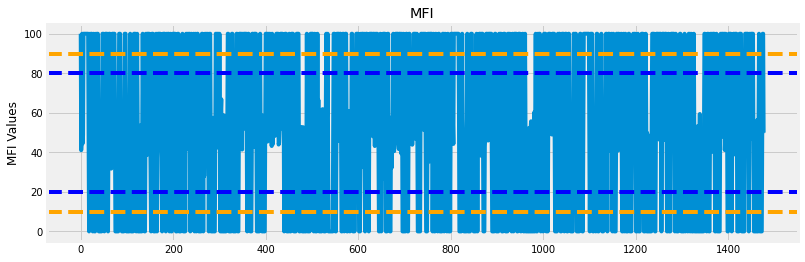

In [ ]:
# create the plot
plt.figure(figsize=(12, 4))
plt.plot(df2['MFI'], label = 'MFI')
plt.title('MFI')
plt.axhline(10, linestyle = '--', color = 'orange')
plt.axhline(20, linestyle = '--', color = 'blue')
plt.axhline(80, linestyle = '--', color = 'blue')
plt.axhline(90, linestyle = '--', color = 'orange')
plt.ylabel('MFI Values')
plt.show()

In [ ]:
# create a new dataframe
new_df = pd.DataFrame()
new_df = df[period:]
new_df['MFI'] = mfi

In [ ]:
# show the new dataframe
new_df

,Date,Open,High,Low,Close,z-score,Volume,Turnover (Rs. Cr),MFI
2014-10-09,9-Oct-14,15434.35,15795.65,15434.35,15741.20,-1.45,27780819,1784.65,100.000000
2014-10-10,10-Oct-14,15603.45,15628.75,15439.35,15453.80,-1.51,24179823,1362.02,41.075177
2014-10-13,13-Oct-14,15360.70,15705.70,15301.65,15677.50,-1.47,26082820,1597.67,46.295455
2014-10-14,14-Oct-14,15790.95,15843.70,15560.25,15751.55,-1.45,32225926,1864.61,100.000000
2014-10-16,16-Oct-14,15690.35,15836.15,15477.05,15541.60,-1.49,30855086,2004.6,44.484210
...,...,...,...,...,...,...,...,...,...
2020-09-25,25-Sep-20,20740.80,21064.30,20430.70,20982.35,-0.36,280646576,5902.57,47.404501
2020-09-28,28-Sep-20,21152.05,21708.85,21055.10,21665.50,-0.22,240223120,5550.96,100.000000
2020-09-29,29-Sep-20,21770.90,21811.50,21280.60,21411.30,-0.27,242993739,5129.99,100.000000
2020-09-30,30-Sep-20,21405.25,21549.35,21128.50,21451.80,-0.26,240051659,5310.13,49.684231


In [ ]:
# create a function to get the buy and sell signal
def get_signal(data, high, low):
    buy_signal = []
    sell_signal = []
    
    for i in range(period-1, len(data['MFI'])):
        if data['MFI'][i] > high:
            buy_signal.append(np.nan)
            sell_signal.append(data['Close'][i])
        elif data['MFI'][i] < low:
            buy_signal.append(data['Close'][i])
            sell_signal.append(np.nan)
        else:
            sell_signal.append(np.nan)
            buy_signal.append(np.nan)
            
        return (buy_signal, sell_signal)


In [ ]:
# add new columns (Buy & Sell)
new_df['Buy'] = get_signal(new_df, 80, 20)[0]
new_df['Sell'] = get_signal(new_df, 80, 20)[1]
new_df

ValueError: ignored

In [ ]:
#plot the data
plt.figure(figsize=(12.2, 4.5))
plt.plot(new_df['Close'], label = 'Close Price', alpha = 0.5)
plt.scatter(new_df.index, new_df['Buy'], color = 'green', label = 'Buy Signal', marker = '^', alpha = 1)
plt.scatter(new_df.index, new_df['Sell'], color = 'red', label = 'Sell Signal', marker = 'v', alpha = 1)
plt.title('Bank Nifty Price')
plt.xlabel('Date')
plt.ylabel('Close Price in Rs.')
plt.legend(loc='upper left')
plt.show()